In [ ]:
!pip install -U imbalanced-learn

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import cv2
import time
import shutil
import random
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Lambda,Flatten

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from collections import Counter


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
img_height, img_width = 224, 224
#img_height, img_width = 456, 456
batch_size = 16


data_dir = '/content/drive/My Drive/TUGAS CERDAS IVAN AZWAR/TUGAS 2/dataset/train'
val_dir = '/content/drive/My Drive/TUGAS CERDAS IVAN AZWAR/TUGAS 2/dataset/val'



train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

class_names = train_ds.class_names
class_counts_dir = Counter()

train_ds_unbatched = train_ds.unbatch()

for _, labels in train_ds_unbatched:
    class_counts_dir.update([class_names[labels.numpy()]])

class_counts_dir = dict(class_counts_dir)
print("Training set class counts:", class_counts_dir)



Found 176 files belonging to 10 classes.
Training set class counts: {'Tang': 32, 'Hp': 18, 'Solder': 16, 'Dompet': 15, 'Pen': 16, 'Korek': 15, 'Pcb': 19, 'Botol': 15, 'Remot': 15, 'Sendok': 15}


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Botol', 'Dompet', 'Hp', 'Korek', 'Pcb', 'Pen', 'Remot', 'Sendok', 'Solder', 'Tang']


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
class_names = val_ds.class_names

class_counts_val = Counter()

val_ds_unbatched = val_ds.unbatch()


for _, labels in val_ds_unbatched:
    class_counts_val.update([class_names[labels.numpy()]])
class_counts_val = dict(class_counts_val)
print("Validation set class counts:", class_counts_val)

Found 63 files belonging to 10 classes.
Validation set class counts: {'Korek': 6, 'Solder': 6, 'Pen': 6, 'Tang': 9, 'Dompet': 6, 'Sendok': 6, 'Botol': 6, 'Pcb': 6, 'Hp': 6, 'Remot': 6}


In [ ]:
class_names = val_ds.class_names
print(class_names)

['Botol', 'Dompet', 'Hp', 'Korek', 'Pcb', 'Pen', 'Remot', 'Sendok', 'Solder', 'Tang']


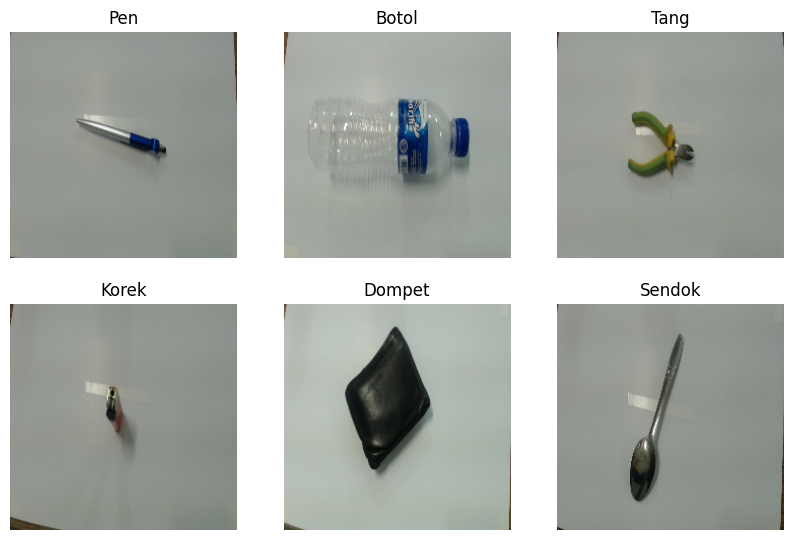

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
resnet_model = Sequential()
input_tensor = Input(shape=(224, 224, 3), name='input_layer_1')
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    pooling='avg'
)
pretrained_model.trainable = False
x = pretrained_model.output
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output_tensor = Dense(10, activation='softmax')(x)

resnet_model = Model(inputs=pretrained_model.input, outputs=output_tensor)

resnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 2,628,106 (10.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.1814 - loss: 2.3968 - val_accuracy: 0.8254 - val_loss: 1.1315
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.7625 - loss: 0.9743 - val_accuracy: 0.9841 - val_loss: 0.4581
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.9323 - loss: 0.5005 - val_accuracy: 1.0000 - val_loss: 0.2039
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 94s 6s/step - accuracy: 0.9932 - loss: 0.2010 - val_accuracy: 1.0000 - val_loss: 0.1127
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.9838 - loss: 0.1331 - val_accuracy: 1.0000 - val_loss: 0.0791
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 1.0000 - loss: 0.0751 - val_accuracy: 1.0000 - val_loss: 0.0561
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 1.0000 - loss: 0.0504 - val_accuracy: 1.0000 - val_loss: 0.0429
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 1.0000 - loss: 0.0489 - val_accuracy: 1.0000 - val_loss:

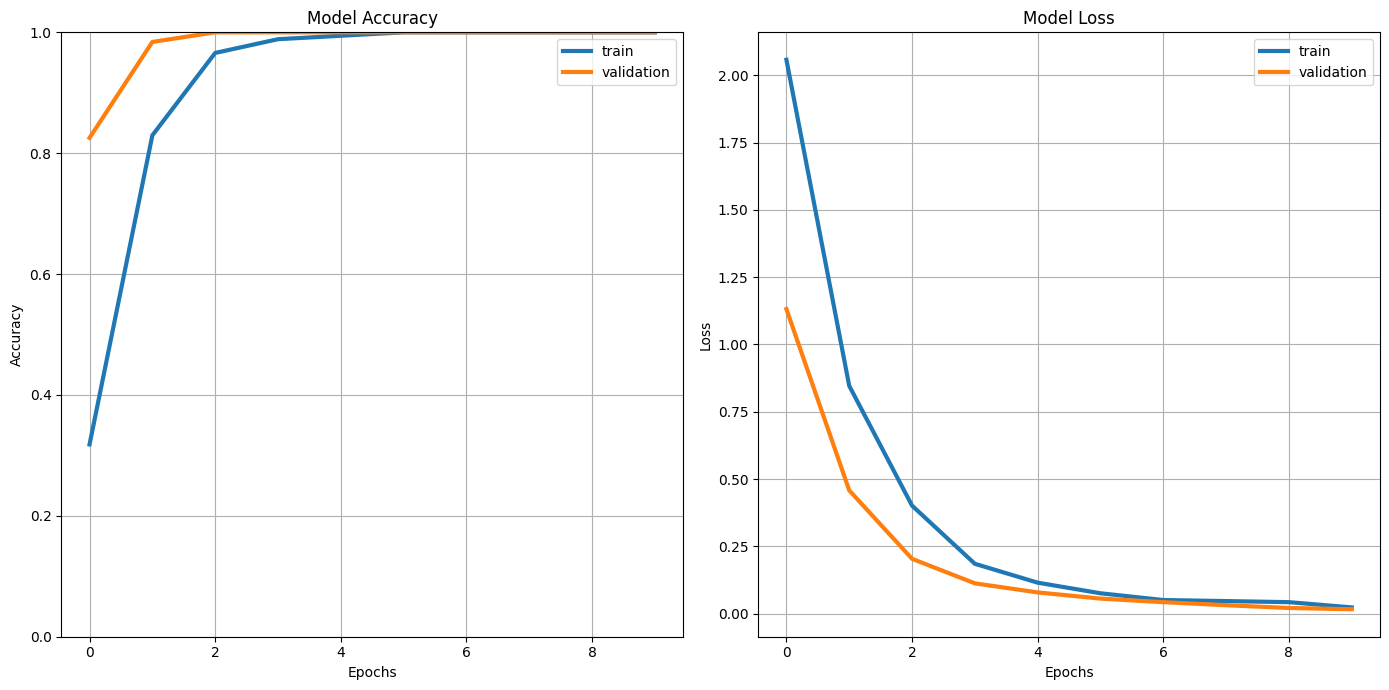

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],linewidth=3)
plt.plot(history.history['val_accuracy'],linewidth=3)
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
fig2 = plt.gcf()
plt.plot(history.history['loss'],linewidth=3)
plt.plot(history.history['val_loss'],linewidth=3)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])


plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


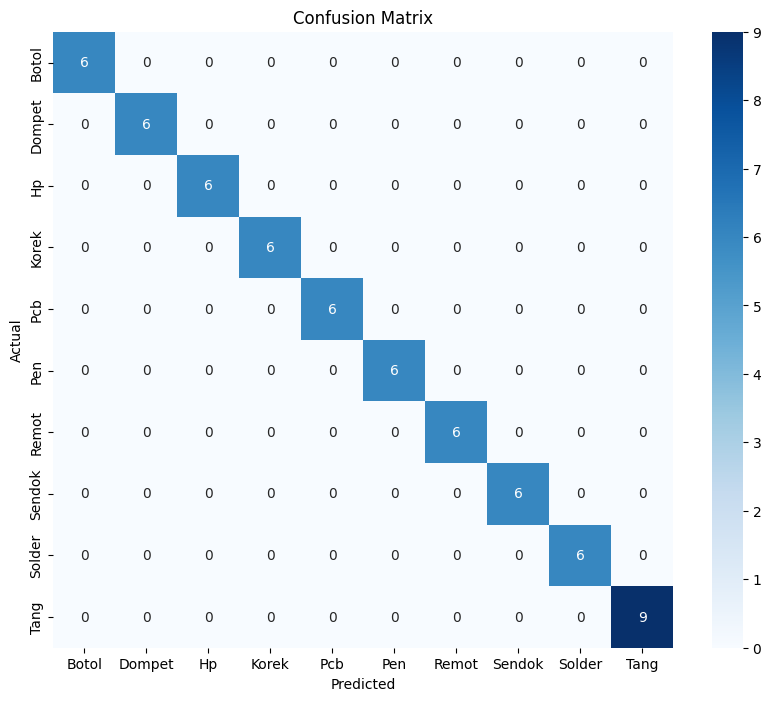

In [ ]:
true_labels = []
predicted_labels = []

for images, labels in val_ds:
    predictions = resnet_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)


conf_matrix = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

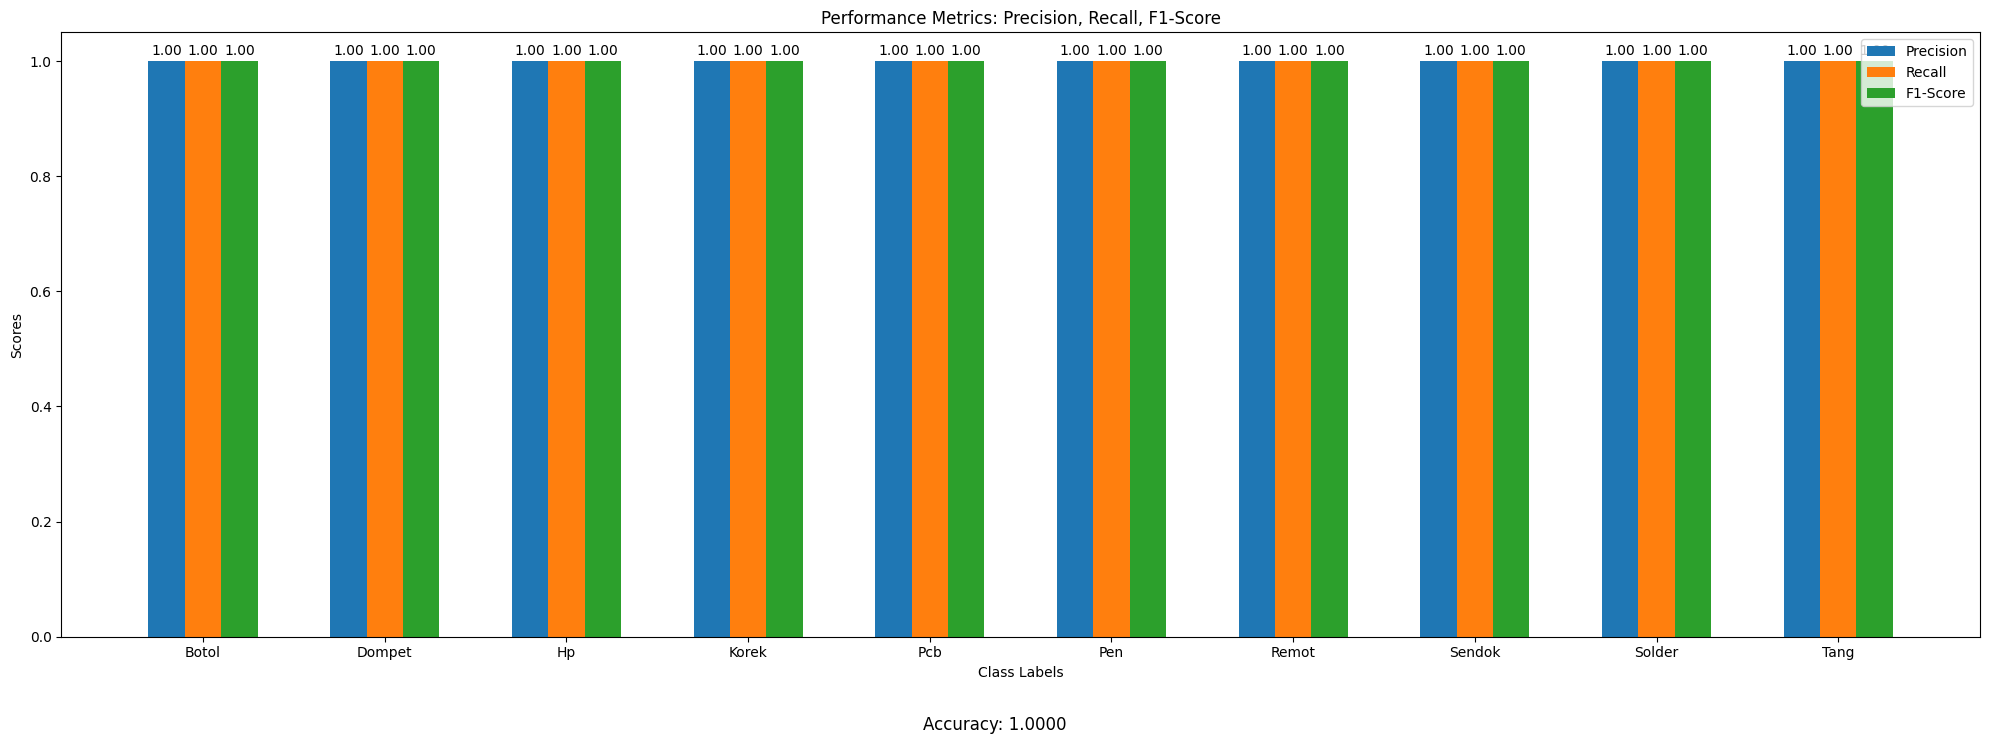

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels)


accuracy = accuracy_score(true_labels, predicted_labels)


x = np.arange(len(class_names))
width = 0.2

plt.figure(figsize=(20, 7))


plt.bar(x - width, precision, width, label='Precision')
for i, v in enumerate(precision):
    plt.text(i - width, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x, recall, width, label='Recall')
for i, v in enumerate(recall):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x + width, f1, width, label='F1-Score')
for i, v in enumerate(f1):
    plt.text(i + width, v + 0.01, f"{v:.2f}", ha='center')


plt.xlabel('Class Labels')
plt.ylabel('Scores')
plt.title('Performance Metrics: Precision, Recall, F1-Score')


plt.figtext(0.5, -0.05, f'Accuracy: {accuracy:.4f}', ha='center', fontsize=12, color='black')

plt.xticks(x, class_names)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
resnet_model.save('/content/drive/My Drive/TUGAS CERDAS IVAN AZWAR/TUGAS 2/cerdasclasification2.h5')